# **Determine width of the eddy edge** 
- **Code written by: Billy Atkinson (watkinson@umces.edu)** 
- **Date of Last Revision: 09/14/2022** 
- **This code plots the average speed along a contour from the smallest radius to the largest radius** 

In [29]:
from matplotlib import pyplot as plt
from numpy import arange, outer
from py_eddy_tracker.observations.observation import EddiesObservations, Table
from numpy import arange, cos, linspace, radians, sin
from py_eddy_tracker.dataset.grid import RegularGridDataset
from py_eddy_tracker.eddy_feature import Contours
from py_eddy_tracker.generic import local_to_coordinates

In [128]:
g = RegularGridDataset("/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004040100_t000.nc","lon","lat",)
c = EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
#c = Contours(g.x_c, g.y_c, g.grid("adt") ,arange(np.min(ssh), np.max(ssh), 0.05))
print(np.shape(c.uavg_profile))
ugos = c.uavg_profile[0,:]
print(ugos)
#print(g.x_c)
#fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])
#a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c.display(ax,extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
#print(c)

We assume pixel position of grid is centered for /data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004040100_t000.nc
File was created with py-eddy-tracker version 'None' but software version is '3.6'


(13, 50)
[0.4523 0.4516 0.4509 0.4502 0.4494 0.4487 0.448  0.4473 0.4466 0.4458
 0.4451 0.4444 0.4437 0.4429 0.4422 0.4415 0.4408 0.4393 0.4373 0.4354
 0.4335 0.4315 0.4296 0.4277 0.4258 0.4238 0.4219 0.42   0.4181 0.4161
 0.4142 0.4123 0.4104 0.4083 0.406  0.4038 0.4015 0.3992 0.3969 0.3947
 0.3924 0.3901 0.3878 0.3856 0.3833 0.381  0.3787 0.3765 0.3742 0.3719]


In [126]:
from py_eddy_tracker import data
#print(g)
g = RegularGridDataset(
    data.get_demo_path("dt_med_allsat_phy_l4_20160515_20190101.nc"),
    "longitude",
    "latitude",
)
print(g.x_c)
c = Contours(g.x_c, g.y_c, g.grid("adt") * 100, arange(-50, 50, 0.2))


We assume pixel position of grid is centered for /data/watkinson/anaconda3/lib/python3.9/site-packages/py_eddy_tracker/data/dt_med_allsat_phy_l4_20160515_20190101.nc


[-5.9375 -5.8125 -5.6875 -5.5625 -5.4375 -5.3125 -5.1875 -5.0625 -4.9375
 -4.8125 -4.6875 -4.5625 -4.4375 -4.3125 -4.1875 -4.0625 -3.9375 -3.8125
 -3.6875 -3.5625 -3.4375 -3.3125 -3.1875 -3.0625 -2.9375 -2.8125 -2.6875
 -2.5625 -2.4375 -2.3125 -2.1875 -2.0625 -1.9375 -1.8125 -1.6875 -1.5625
 -1.4375 -1.3125 -1.1875 -1.0625 -0.9375 -0.8125 -0.6875 -0.5625 -0.4375
 -0.3125 -0.1875 -0.0625  0.0625  0.1875  0.3125  0.4375  0.5625  0.6875
  0.8125  0.9375  1.0625  1.1875  1.3125  1.4375  1.5625  1.6875  1.8125
  1.9375  2.0625  2.1875  2.3125  2.4375  2.5625  2.6875  2.8125  2.9375
  3.0625  3.1875  3.3125  3.4375  3.5625  3.6875  3.8125  3.9375  4.0625
  4.1875  4.3125  4.4375  4.5625  4.6875  4.8125  4.9375  5.0625  5.1875
  5.3125  5.4375  5.5625  5.6875  5.8125  5.9375  6.0625  6.1875  6.3125
  6.4375  6.5625  6.6875  6.8125  6.9375  7.0625  7.1875  7.3125  7.4375
  7.5625  7.6875  7.8125  7.9375  8.0625  8.1875  8.3125  8.4375  8.5625
  8.6875  8.8125  8.9375  9.0625  9.1875  9.3125  9

File was created with py-eddy-tracker version 'None' but software version is '3.6'
File was created with py-eddy-tracker version 'None' but software version is '3.6'


"\n# If we normalize indice of contour to set speed contour to 1 and inner contour to 0\nax = plt.subplot(111)\nh_in = c.height_inner_contour\nh_s = c.height_max_speed_contour\nh_e = c.height_external_contour\nr = (h_e - h_in) / (h_s - h_in)\nnb_pt = e.uavg_profile.shape[1]\n# Create an x array for each profile\nx = outer(arange(nb_pt) / nb_pt, r)\nplt.axvline(x=1,color='k',label='speed contour')\n"

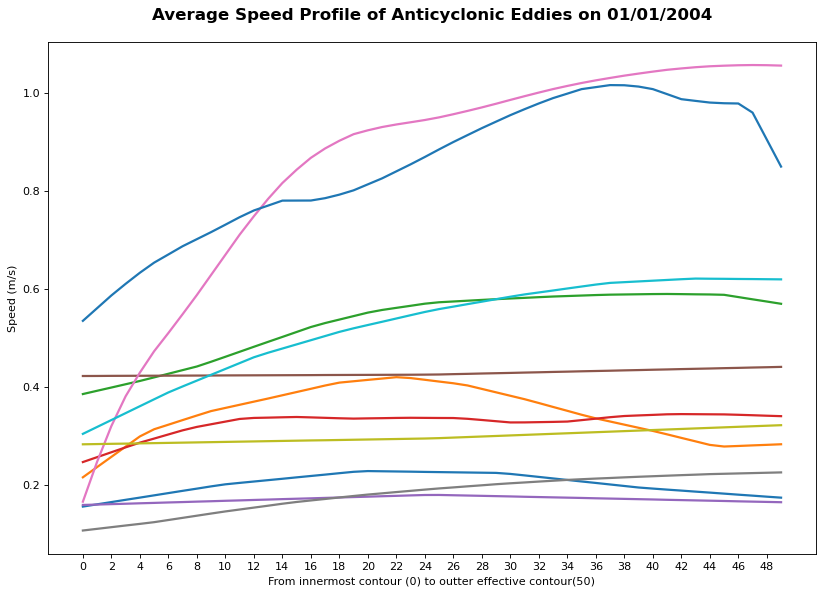

In [134]:
c= EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
a= EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')

import glob
#anti_files = sorted(glob.glob('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_2004041*.nc'))
#c = EddiesObservations.concatenate(
#    [EddiesObservations.load_file(i) for i in anti_files])
#c.effective_contour_height
# Profile from inner to outter
fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])


plt.title('Average Speed Profile of Anticyclonic Eddies on 01/01/2004',loc='center',fontsize=15,fontweight='bold',y=1.03)
#plt.title('Average Speed Profile of Cyclonic Eddies on 01/01/2004',loc='center',fontsize=15,fontweight='bold',y=1.03)
ax.plot(a.uavg_profile[:, ::-1].T, lw=2)
plt.xticks(np.arange(0,50,2))
_ = ax.set_xlabel("From innermost contour (0) to outter effective contour(50)"), ax.set_ylabel("Speed (m/s)")

# If we normalize indice of contour to set speed contour to 1 and inner contour to 0
ax = plt.subplot(111)
h_in = c.height_inner_contour
h_s = c.height_max_speed_contour
h_e = c.height_external_contour
r = (h_e - h_in) / (h_s - h_in)
nb_pt = e.uavg_profile.shape[1]
# Create an x array for each profile
x = outer(arange(nb_pt) / nb_pt, r)
plt.axvline(x=1,color='k',label='speed contour')


File was created with py-eddy-tracker version 'None' but software version is '3.6'


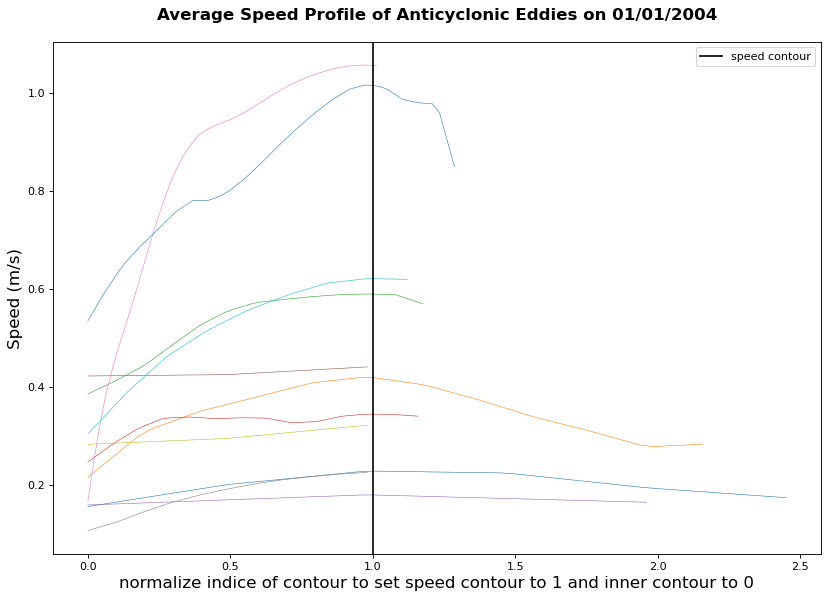

In [140]:
# If we normalize indice of contour to set speed contour to 1 and inner contour to 0
fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])

#c= EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
c= EddiesObservations.load_file('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')

plt.title('Average Speed Profile of Anticyclonic Eddies on 01/01/2004',loc='center',fontsize=15,fontweight='bold',y=1.03)
#plt.title('Average Speed Profile of Cyclonic Eddies on 01/01/2004',loc='center',fontsize=15,fontweight='bold',y=1.03)

h_in = c.height_inner_contour
h_s = c.height_max_speed_contour
h_e = c.height_external_contour
r = (h_e - h_in) / (h_s - h_in)
nb_pt = e.uavg_profile.shape[1]
# Create an x array for each profile
x = outer(arange(nb_pt) / nb_pt, r)
ax.plot(x, c.uavg_profile[:, ::-1].T, lw=0.5)
_ = ax.set_xlabel("normalize indice of contour to set speed contour to 1 and inner contour to 0",fontsize=15), ax.set_ylabel("Speed (m/s)",fontsize=15)
plt.axvline(x=1,color='k',label='speed contour')
plt.legend(loc='best')

In [11]:
c.num_contours

array([ 4,  3,  5, 19,  6,  4,  3,  4,  3,  7,  3, 19,  6], dtype=uint16)

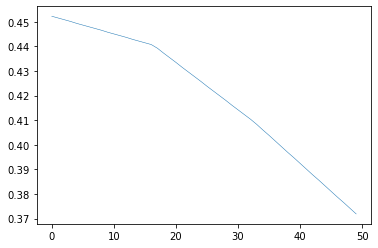

In [13]:
ax = plt.subplot(111)
#e = c.extract_with_mask(c.num_contours < 4)
_ = ax.plot(c.uavg_profile[0].T, lw=0.5)

In [15]:
from py_eddy_tracker.eddy_feature import Contours
c.display(ax,step = 1)

AttributeError: 'Line2D' object has no property 'step'

In [17]:
import xarray as xr
hycom_in = xr.open_dataset("/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2006030900_t000.nc")
hycom_in


<xarray.Dataset>
Dimensions:  (time: 1, lon: 541, lat: 346)
Coordinates:
  * time     (time) datetime64[ns] 2006-03-09
  * lon      (lon) float64 -98.0 -97.96 -97.92 -97.88 ... -76.48 -76.44 -76.4
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Data variables:
    adt      (lat, lon, time) float32 ...
    ugos     (lat, lon, time) float32 ...
    vgos     (lat, lon, time) float32 ...

File was created with py-eddy-tracker version 'None' but software version is '3.6'


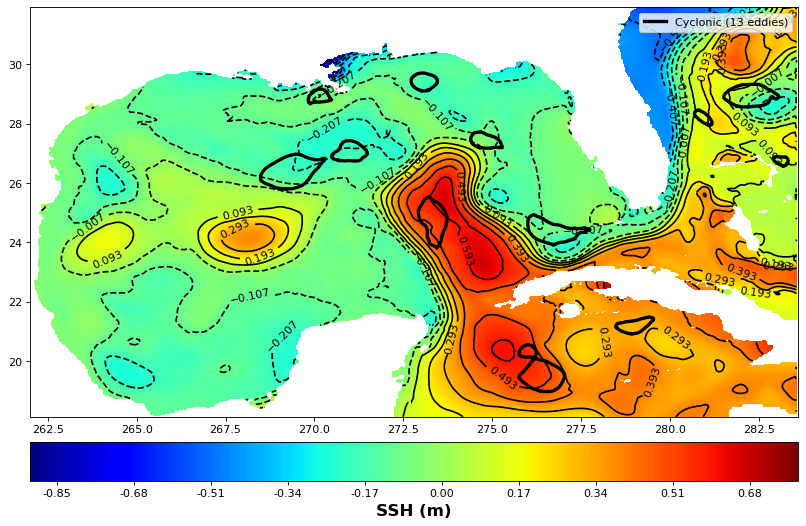

In [124]:
hycom_in = "/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004040100_t000.nc"

import numpy as np
SSH_data = xr.open_dataset(hycom_in)
#create xes and figure parameters
fig = plt.figure(figsize=(12, 8), dpi=80)
#ax = fig.add_axes([.03,.03,.94,.94])
ax = fig.add_axes([.03,.03,.8,.8])

a = EddiesObservations.load_file(('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040401.nc'))
#c = EddiesObservations.load_file(('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040401.nc'))
#ax.set_xlim(-97.5, -77.5)
#plt.title('PET Rejection Criteria: Green=Accepted, Red=Shape Error\nBlack=under/above pixel limit, Yellow=Ampliude, Blue=masked value with contour'
              #,loc='center',fontsize=15,fontweight='bold',y=1.03)
#plt.title('Amplitude Adjustments: Max # local extrema in contour=5, Min # of intervals to consider contour as eddy=4' 
          #'\n# of intervals to be considered another extrema=2'
            #  ,loc='center',fontsize=15,fontweight='bold',y=1.03)
#plt.suptitle(date,color='red',fontsize=12,fontweight='bold',x=.4,y=.85)
#load in lat, lon and SSh data for plot and print min and max SSH
lat=SSH_data.lat
lon=SSH_data.lon+360
#ax.set_xlim(-97.5, -77.5)
#lon=SSH_data.lon
ssh = SSH_data.adt
#print(np.min(ssh))
#print(np.max(ssh))
#Make lon and lat a 2d mesh grid for plotting purposes
lon2d,lat2d=np.meshgrid(lon,lat)
cf = ax.contourf(lon2d,lat2d,ssh[:,:,0],cmap='jet',levels=np.linspace(np.min(ssh),np.max(ssh)+.1,400))
cl = ax.contour(lon2d,lat2d,ssh[:,:,0],colors='k',alpha=1,levels=np.arange(np.min(ssh),np.max(ssh)+.1,.1))
#Use to add legend with the number of anticyclonic and cyclonic eddies that day
#a.display(ax, extern_only=True, label='Anticyclonic ({nb_obs} eddies)',color='blue',lw=3,ls='solid') 
c.display(ax, extern_only=True, label="Cyclonic ({nb_obs} eddies)", color="k", lw=3,ls='solid')
#displays all the contours from the HYCOM data and which ones were accepted as eddies and which ones were not including the reason
#g.contours.display(ax,display_criterion=True)
plt.clabel(cl, inline=1, fontsize=10)
cbar = fig.colorbar(cf,location='bottom',format='%.2f',pad=.05)#shrink=.6,pad=.04)
cbar.ax.set_xlabel('SSH (m)',fontsize=15,fontweight='bold')
_= ax.legend(loc="best")

In [75]:
#use center lon and lat to build a circle of radius r every 10 km, with this array of circles, find the u,v value at each lon lat point
a = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
c = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004010100_t000.nc')
z = list()
z_final =  list()
a = a.isel(radius
print(a)
'''
for i in a:
    
    anti_eddy_lon_center = a.longitude[i]
    #cycl_eddy_lon_center = c.longitude[i]
    anti_eddy_lat_center = a.latitude[i]
    #cycl_eddy_lat_center = c.latitude[i]
    anti_eddy_radius = a.effective_radius[i]
    #cycl_eddy_radius = c.effective_radius[i]
    for j in arange(10,anti_eddy_radius,100):
        x = build_circle(anti_eddy_lon_center,anti_eddy_lat_center,j)
        x=np.array(x)
        lon_c = np.array(x[0,:])
        lat_c = np.array(x[1,:])
    #print(lon)
        from py_eddy_tracker.generic import local_to_coordinates
        z_c = local_to_coordinates(lon_c,lat_c,269.36493,26.395357)
        z_c = np.array(np.transpose(z_c))
        z=np.concatenate(z,z_c)
    z_final=np.concatenate(z_final,z)
'''

KeyError: 0

In [90]:
#use center lon and lat to build a circle of radius r every 10 km, with this array of circles, find the u,v value at each lon lat point
a = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Anticyclonic/Anticyclonic_20040101.nc')
c = xr.open_dataset('/data/watkinson/Summer2022/data/eddies/Cyclonic/Cyclonic_20040101.nc')
SSH_data = xr.open_dataset('/data/watkinson/Summer2022/data/hycom_ssh/Daily_SSH_files/hycom_gomu_501_2004010100_t000.nc')
#z = list()

anti_eddy_lon_center = a.longitude[0]
#print(anti_eddy_lon_center)
    #cycl_eddy_lon_center = c.longitude[0]
anti_eddy_lat_center = a.latitude[0]
    #cycl_eddy_lat_center = c.latitude[i]
#print(anti_eddy_lat_center)
anti_eddy_radius = a.effective_radius[0]
#print(anti_eddy_radius)
x = build_circle(263.81076,23.767078,10)
x=np.array(x)
lon_c = np.array(x[0,:])
lat_c = np.array(x[1,:])
    #print(lon)
from py_eddy_tracker.generic import local_to_coordinates
z = local_to_coordinates(lon_c,lat_c,263.81076,23.767078)
z = list(np.array(np.transpose(z)))

#cycl_eddy_radius = c.effective_radius[i]
for j in arange(100,64650,5000):
    from py_eddy_tracker.generic import build_circle
    x = build_circle(263.81076,23.767078,j)
    x=np.array(x)
    lon_c = np.array(x[0,:])
    lat_c = np.array(x[1,:])
    #print(lon)
    from py_eddy_tracker.generic import local_to_coordinates
    z_c = local_to_coordinates(lon_c,lat_c,263.81076,23.767078)
    z_c = np.array(np.transpose(z_c))
    z=np.concatenate([z,z_c])
  

In [91]:
print(z)

[[263.81345063  23.76729172]
 [263.81344983  23.76730322]
 [263.81344742  23.76731453]
 ...
 [264.384011    23.62913641]
 [264.39876796  23.69706263]
 [264.40392859  23.76615923]]


In [92]:
print(np.shape(z))

(700, 2)


In [100]:
z = z.reshape(14,50,2)
while n < len(a.obs):
    z = z[i,:,:]
    

(14, 50, 2)
[[[263.81345063  23.76729172]
  [263.81344983  23.76730322]
  [263.81344742  23.76731453]
  ...
  [263.81344742  23.76726891]
  [263.81344983  23.76728022]
  [263.81345063  23.76729172]]

 [[263.81433503  23.7672917 ]
  [263.81432696  23.7674067 ]
  [263.8143029   23.76751982]
  ...
  [263.81430288  23.76706359]
  [263.81432696  23.7671767 ]
  [263.81433503  23.7672917 ]]

 [[263.86346811  23.7672828 ]
  [263.86305902  23.77314808]
  [263.86183364  23.77891732]
  ...
  [263.8618245   23.75564938]
  [263.8630543   23.7614178 ]
  [263.86346811  23.7672828 ]]

 ...

 [[264.30566387  23.76650338]
  [264.30183965  23.82413164]
  [264.28998445  23.88083877]
  ...
  [264.28914331  23.6522689 ]
  [264.30140493  23.70890076]
  [264.30566387  23.76650338]]

 [[264.35479629  23.76633907]
  [264.35061423  23.82971985]
  [264.33759825  23.89209029]
  ...
  [264.33658135  23.64070987]
  [264.35008865  23.7029893 ]
  [264.35479629  23.76633907]]

 [[264.40392859  23.76615923]
  [264.39939

In [109]:
z_sub = z[0,:,:]
#print(z_sub)
z_l = np.array(z_sub[0,:])
print(z_l)

[263.81345063  23.76729172]


In [116]:
lat = np.where(lat==23.76729172)
lon = np.where(lon ==263.81345063)
print(np.shape(SSH_data.ugos))

(346, 541, 1)


In [117]:
ugos = SSH_data.ugos[:,0,0]
print(ugos)

<xarray.DataArray 'ugos' (lat: 346)>
array([nan, nan, nan, ..., nan, nan, nan], dtype=float32)
Coordinates:
    time     datetime64[ns] 2004-01-01
    lon      float64 -98.0
  * lat      (lat) float64 18.12 18.16 18.2 18.24 ... 31.8 31.84 31.88 31.92
Attributes:
    units:    m/s


In [119]:
lat = SSH_data.lat
lat = list(lat)
index = lat.index(23.76729172)
print(index)
n=0
while n < len(sat_file_names):
    ds = xr.open_dataset(sat_file_objects[n])
    ds['lon']=ds.lon + 360
    ds_out = xr.open_dataset(ssh_file_objects[n])
    regridder = xe.Regridder(ds,ds_out,"bilinear")
    ds_regrid = regridder(ds)
    dir = '/data/watkinson/Summer2022/data/cafe/1day_regrid/'
    ds_regrid.to_netcdf(dir + sat_file_names[n])
    n=n+1 

ValueError: 23.76729172 is not in list

In [ ]:
n=0
while n < len(sat_file_names):
    ds = xr.open_dataset(sat_file_objects[n])
    ds['lon']=ds.lon + 360
    ds_out = xr.open_dataset(ssh_file_objects[n])
    regridder = xe.Regridder(ds,ds_out,"bilinear")
    ds_regrid = regridder(ds)
    dir = '/data/watkinson/Summer2022/data/cafe/1day_regrid/'
    ds_regrid.to_netcdf(dir + sat_file_names[n])
    n=n+1 